# Business Problem

## Background
In the insurance industry, accurately predicting insurance claims is crucial for managing risk, optimizing operational efficiency, and enhancing customer satisfaction. An insurance company wants to improve its ability to predict which customers are likely to file a claim based on various features like duration of travel, net sales, commission in value, and customer age. Accurate predictions will help the company in risk assessment, policy pricing, and fraud detection.

## Problem Statement
The current predictive model for insurance claims is not performing optimally, leading to missed claims (false negatives) which can be costly for the business. The primary goal is to develop a robust predictive model that maximizes recall to ensure that as many claims as possible are correctly identified. This will help in better risk management, customer trust, and regulatory compliance.

## Objectives
- Develop a Predictive Model: Create a machine learning model to predict whether a customer will make an insurance claim based on their travel and demographic data.
- Maximize Recall: Focus on maximizing recall to minimize the number of false negatives, ensuring that most claims are correctly identified.
- Handle Class Imbalance: Implement techniques such as SMOTE to deal with class imbalance, ensuring the model is effective in identifying the minority class (claims).
- Feature Selection: Identify and select the most relevant features that contribute to predicting insurance claims to enhance model performance.
- Threshold Optimization: Adjust the decision threshold to further improve recall, ensuring that the model is sensitive enough to catch most claims.

## Goals
- Improve Risk Management: By accurately predicting claims, the company can better assess risk and adjust premiums accordingly.
- Enhance Customer Satisfaction: Ensuring that legitimate claims are not missed helps in maintaining customer trust and satisfaction.
- Regulatory Compliance: Adhere to industry regulations by accurately identifying and processing insurance claims.
- Optimize Operational Efficiency: Reduce the cost and effort involved in handling false positives by fine-tuning the model's threshold.



### Steps to Achieve the Objectives

1 Data Cleaning and Preprocessing:

- Remove duplicate rows.
- Handle missing values appropriately.
- Remove outliers to improve model performance.

2. Exploratory Data Analysis (EDA):

- Understand the distribution of features.
- Analyze the relationship between features and the target variable (Claim).

3. Feature Engineering:

- Encode categorical variables appropriately.

4. Model Development:

- Develop multiple models (Logistic Regression, Gradient Boosting, etc.) and tune hyperparameters using GridSearchCV focusing on recall.
- Handle class imbalance using techniques like SMOTE.

5. Threshold Adjustment:

- Adjust the decision threshold of the best model to maximize recall.

6. Model Evaluation:

- Evaluate the model using metrics such as recall, precision, F1-score, and confusion matrix.
Generate a comprehensive model evaluation report.

In [171]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import libraries for preprocessing, modeling and tuning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, precision_recall_curve, average_precision_score, PrecisionRecallDisplay
import category_encoders as ce
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import kruskal, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

#### Load and Inspect Dataset

In [18]:
#load dataset
df = pd.read_csv('/Users/radhitaintan/Documents/modul 3/Travel Insurance/data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [19]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [20]:
# Display the first few rows of the dataset
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [183]:
total_rows = len(df)  # Total number of rows in the DataFrame
duplicated_rows = df.duplicated().sum()  # Number of duplicated rows

# Calculate the percentage of duplicated data
percentage_duplicates = (duplicated_rows / total_rows) * 100

print(f"Percentage of Duplicated Data: {percentage_duplicates:.2f}%")

Percentage of Duplicated Data: 10.53%


In [21]:
#check for duplicate

# Find duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Display some of the duplicate rows to understand what's being duplicated
if duplicates.sum() > 0:
    
    print(df[duplicates])

Number of duplicate rows: 4667
      Agency    Agency Type Distribution Channel  \
331      EPX  Travel Agency               Online   
360      EPX  Travel Agency               Online   
473      EPX  Travel Agency               Online   
488      EPX  Travel Agency               Online   
636      EPX  Travel Agency               Online   
...      ...            ...                  ...   
44309    EPX  Travel Agency               Online   
44311    CWT  Travel Agency               Online   
44313    EPX  Travel Agency               Online   
44315    EPX  Travel Agency               Online   
44321    EPX  Travel Agency               Online   

                          Product Name Gender  Duration Destination  \
331                  Cancellation Plan    NaN         2   SINGAPORE   
360                  Cancellation Plan    NaN         6    MALAYSIA   
473                  Cancellation Plan    NaN        11    MALAYSIA   
488                  Cancellation Plan    NaN         2   SI

#### Data Cleaning

In [22]:
# Remove duplicate rows 
df_clean = df.drop_duplicates()
print("Number of rows after removing duplicates:", df_clean.shape[0])

Number of rows after removing duplicates: 39661


In [23]:
# Replace '?' and '-' with NaN
df_clean.replace(['?', '-'], np.nan, inplace=True)


In [24]:
100*(df_clean.isna().sum())/len(df_clean)

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  69.758705
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

In [25]:
# Calculate the distribution of 'Gender'
gender_distribution = df_clean['Gender'].value_counts(dropna=False)

# Calculate the percentage distribution
gender_percentage = (gender_distribution / len(df_clean['Gender'])) * 100

# Print the results
print("Gender Distribution:\n", gender_distribution)
print("\nGender Percentage:\n", gender_percentage)

Gender Distribution:
 Gender
NaN    27667
M       6074
F       5920
Name: count, dtype: int64

Gender Percentage:
 Gender
NaN    69.758705
M      15.314793
F      14.926502
Name: count, dtype: float64


In [26]:
# Replace missing values in 'Gender' with 'Prefer not to say'
df_clean['Gender'].fillna('Prefer not say', inplace=True)

In [27]:
df_clean['Gender'].value_counts(normalize=True)

Gender
Prefer not say    0.697587
M                 0.153148
F                 0.149265
Name: proportion, dtype: float64

In [28]:
#check the missing values after we fill the values in gender
df_clean.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

#### Checking Outliers

In [29]:
#summary statistic for numerical values
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,39661.0,52.397822,113.542824,-1.0,11.0,25.0,57.00,4881.0
Net Sales,39661.0,42.342794,50.025244,-357.5,19.0,29.0,50.00,810.0
Commision (in value),39661.0,10.442622,20.355921,0.0,0.0,0.0,11.88,283.5
Age,39661.0,39.930284,13.526346,0.0,34.0,36.0,45.00,118.0


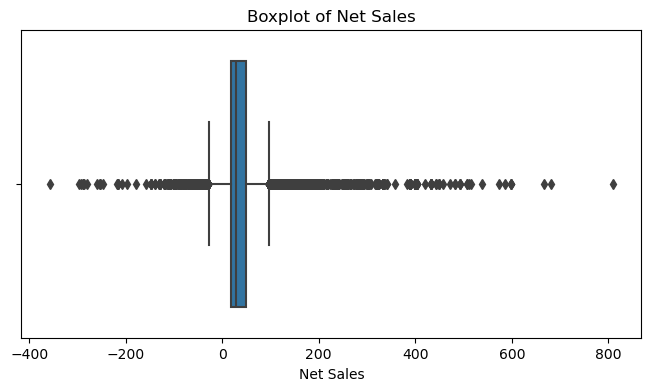

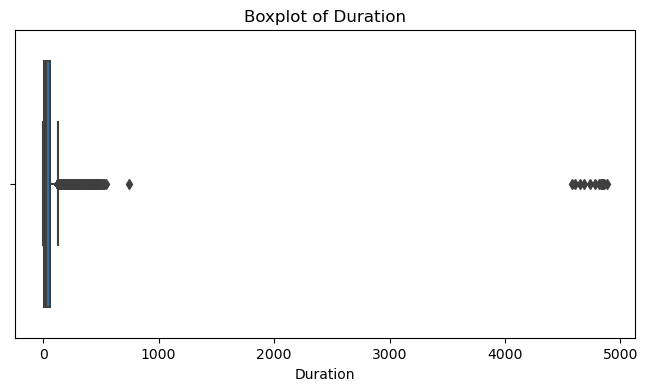

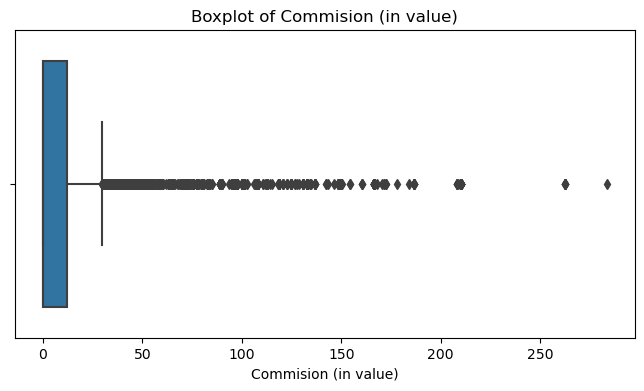

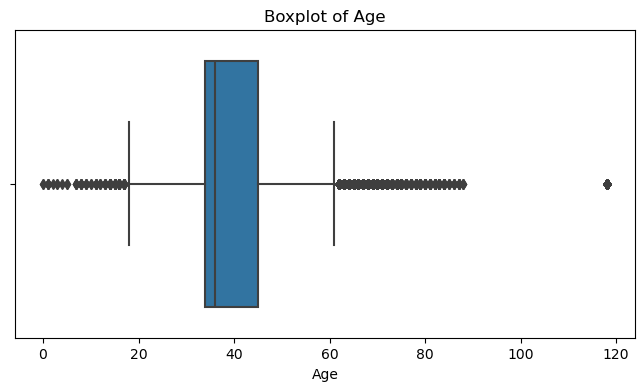

In [30]:
# Visual inspection using boxplots for 'Net Sales','Duration','Commission' and 'Age'
columns_to_check = ['Net Sales', 'Duration','Commision (in value)', 'Age'] 

for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_clean[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [31]:
# List of numerical columns to check for outliers using IQR 

numerical = ['Net Sales', 'Duration', 'Commision (in value)', 'Age'] 

def calculate_outliers(data,column): 
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5 * IQR)
    upper_bound = Q3+(1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
outlier_data = []

for i in numerical:
    outliers_result, lower_bound, upper_bound = calculate_outliers(df_clean, i)  # Use df_clean if you've already cleaned the dataset
    total_outlier = len(outliers_result)
    outlier_percentage = round((total_outlier / len(df_clean[i])) * 100, 2)  # Corrected percentage calculation
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=['Column', 'Total Outliers', 'Percentage', 'Lower Bound', 'Upper Bound'])
outlier_df

,Column,Total Outliers,Percentage,Lower Bound,Upper Bound
0,Net Sales,3597,9.07,-27.50,96.5
1,Duration,3495,8.81,-58.00,126.0
2,Commision (in value),4084,10.30,-17.82,29.7
3,Age,2303,5.81,17.50,61.5


#### Handling outliers

In [32]:
#remove outlier
def remove_outliers(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]


In [33]:
# Columns to clean
columns_to_check = ['Net Sales', 'Duration', 'Commision (in value)', 'Age']

# Remove outliers iteratively
for column in columns_to_check:
    df_clean = remove_outliers(df_clean, column)
df_clean

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
1,EPX,Travel Agency,Online,Cancellation Plan,Prefer not say,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No
5,EPX,Travel Agency,Online,Cancellation Plan,Prefer not say,2,SINGAPORE,10.0,0.0,36,No
6,EPX,Travel Agency,Online,1 way Comprehensive Plan,Prefer not say,25,"KOREA, REPUBLIC OF",50.0,0.0,36,No
...,...,...,...,...,...,...,...,...,...,...,...
44320,EPX,Travel Agency,Online,2 way Comprehensive Plan,Prefer not say,7,VIET NAM,34.0,0.0,36,No
44322,EPX,Travel Agency,Online,2 way Comprehensive Plan,Prefer not say,6,THAILAND,40.0,0.0,36,No
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,Prefer not say,14,CHINA,30.0,0.0,36,Yes
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.5,50,No


In [34]:
# Display the new size of the dataset after removing outliers
df_clean.shape

(27397, 11)

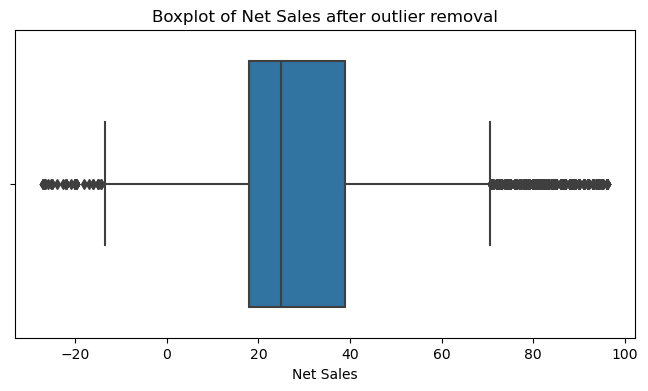

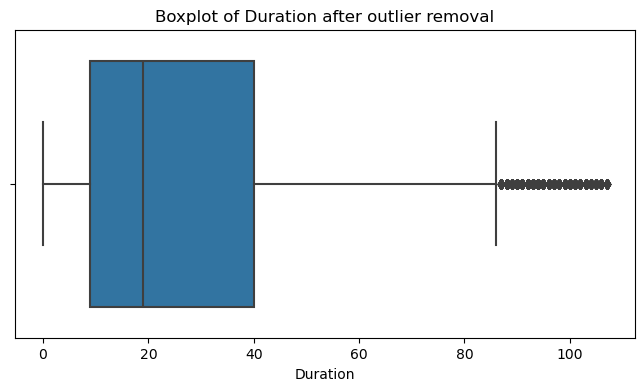

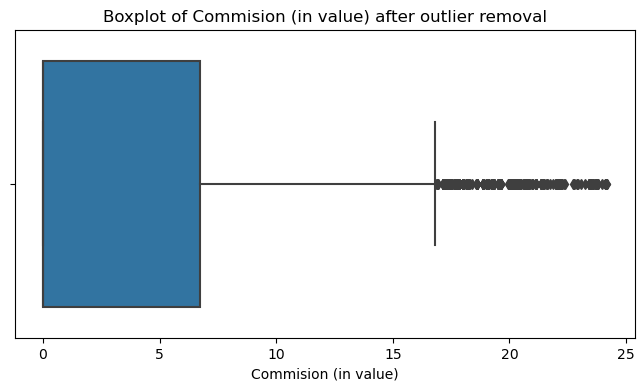

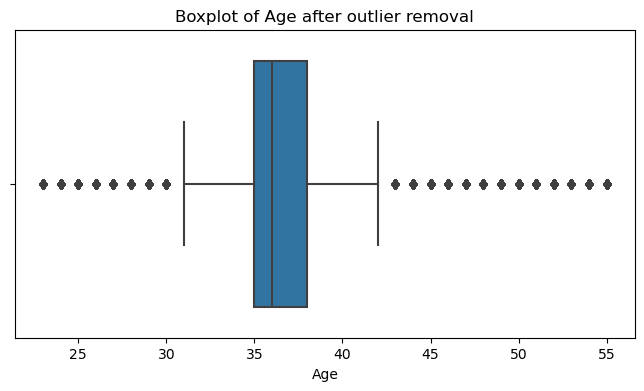

In [35]:
# Visualization of the cleaned data
for column in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_clean[column])
    plt.title(f'Boxplot of {column} after outlier removal')
    plt.show()

#### Explanatory Data Analysis

In [36]:
# Generate a data description list
dataDesc = []
for column in df_clean.columns:
    # To safely sample without throwing errors when the dataset has fewer unique values
    unique_samples = df_clean[column].drop_duplicates().sample(min(2, df_clean[column].nunique()), replace=False).values
    dataDesc.append([
        column,
        df_clean[column].dtypes,
        df_clean[column].isna().sum(),
        round(((df_clean[column].isna().sum() / len(df_clean)) * 100), 2),
        df_clean[column].nunique(),
        unique_samples
    ])

# Create a DataFrame for the data description
data_description_df = pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

data_description_df

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Agency,object,0,0.0,13,"[ART, JZI]"
1,Agency Type,object,0,0.0,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.0,2,"[Online, Offline]"
3,Product Name,object,0,0.0,18,"[Travel Cruise Protect, Ticket Protector]"
4,Gender,object,0,0.0,3,"[Prefer not say, M]"
5,Duration,int64,0,0.0,108,"[49, 2]"
6,Destination,object,0,0.0,126,"[CAMBODIA, BRUNEI DARUSSALAM]"
7,Net Sales,float64,0,0.0,577,"[1.48, 37.0]"
8,Commision (in value),float64,0,0.0,538,"[22.0, 6.63]"
9,Age,int64,0,0.0,33,"[45, 24]"


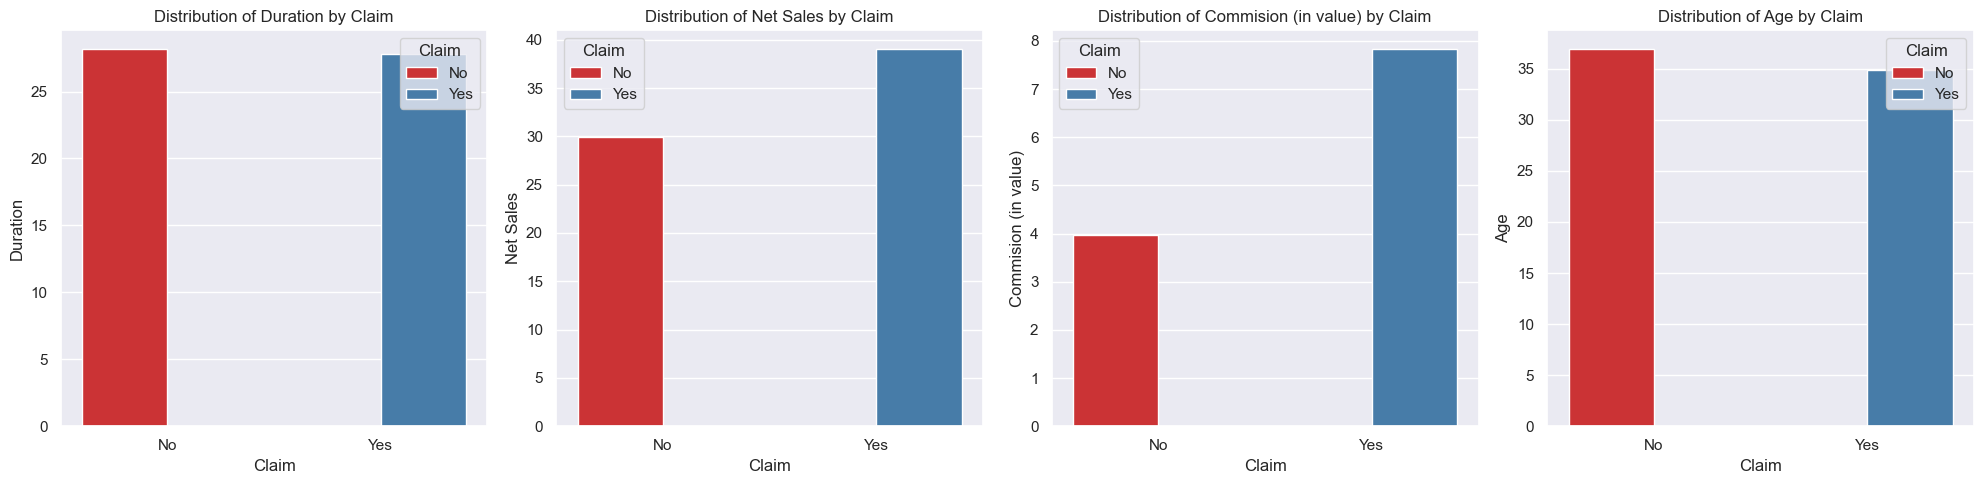

In [37]:
# Numerical Analysis
features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

plt.figure(figsize=(20, 5))  # Adjust the figure size if needed
sns.set(palette='Set1')  # Set the color palette
plotnumber = 1

for feature in features:
    ax = plt.subplot(1, 4, plotnumber)  # Adjust the subplot grid to 1 row and 4 columns
    sns.barplot(data=df_clean, x='Claim', y=feature, hue='Claim', errorbar=None)
    plt.xlabel('Claim')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} by Claim')
    plotnumber += 1
    plt.tight_layout()

plt.show()


In [38]:
df_clean.groupby('Claim')[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].mean()

,Duration,Net Sales,Commision (in value),Age
Claim,,,,
No,28.157926,29.986539,3.961825,36.911458
Yes,27.768802,39.015070,7.828440,34.852368


Average Duration

- No Claim: The average duration for trips where no insurance claim was made is approximately 28 days.
- Yes Claim: For trips where a claim was made, the average duration is slightly lower at about 26 days.
- Insight: Duration appears to be slightly lower for trips that led to a claim. However, the difference is minor, suggesting that trip duration may not significantly influence the likelihood of a claim.


Average Net Sales

- No Claim: The average net sales for trips with no claims is around $29.98.
- Yes Claim: The average net sales for trips with claims is higher, at $39.01.
- Insight: This suggests that higher net sales might be associated with a higher likelihood of a claim, possibly because more expensive policies might cover more risky trips or activities that are more likely to lead to claims.


Average Commission (in value)

- No Claim: The average commission for no-claim trips is $3.96.
- Yes Claim: For trips with claims, the average commission is significantly higher at $7.82.
- Insight: Higher commissions are associated with claims, which might indicate that more comprehensive or expensive insurance plans that yield higher commissions are more likely to be associated with claims.


Average Age

- No Claim: The average age of customers not filing a claim is approximately 36-37 years.
- Yes Claim: The average age for those who made a claim is slightly younger, at about 34-35 years.
- Insight: younger travelers, on average, appear to make more claims than older travelers. This could be due to younger travelers engaging in riskier activities or perhaps traveling under circumstances more prone to requiring claims.


Overall Insights

Policies that lead to claims tend to have longer durations, higher net sales, and generate more commission. This suggests that such policies are possibly more comprehensive or taken for trips perceived as riskier by the insured. Age shows a lesser but still noticeable variation, potentially pointing towards a demographic that's slightly more prone to filing claims.

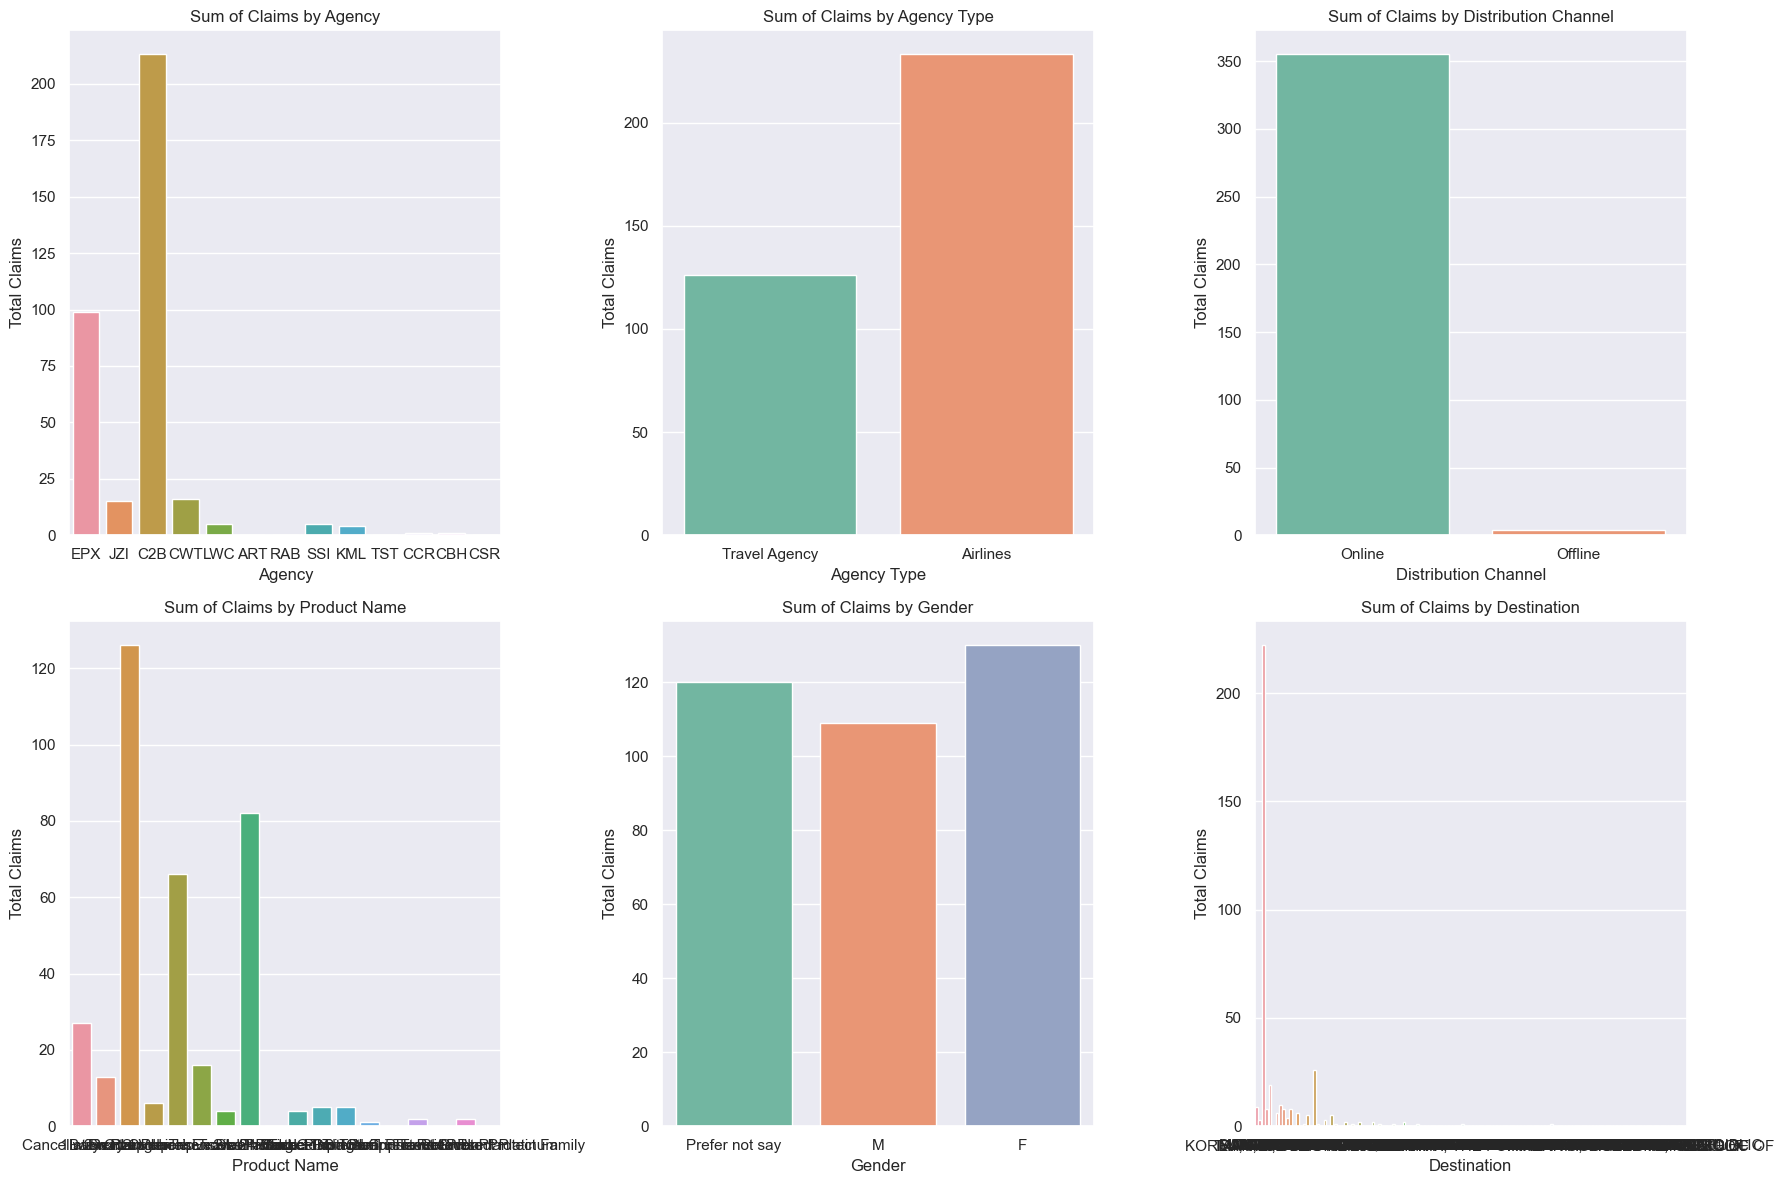

In [39]:
# Ensure 'Claim' is numeric
df_clean['Claim'] = df_clean['Claim'].map({'No': 0, 'Yes': 1})

# Categorical Analysis
features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']

plt.figure(figsize=(18,12))
sns.set(palette='Set2')
plotnumber = 1

for feature in features:
    ax = plt.subplot(2, 3, plotnumber)
    sns.barplot(data=df_clean, x=feature, y='Claim', estimator=np.sum, errorbar=None)
    plt.xlabel(feature)
    plt.ylabel('Total Claims')
    plt.title(f'Sum of Claims by {feature}')
    plotnumber += 1
    plt.tight_layout()

plt.show()


1. Agency
- EPX: Around 60 claims.
- C2B: The highest number of claims, approximately 220.
- Others (JZI, CSR, etc.): Relatively lower number of claims, each with less than 30 claims.

2. Agency Type
- Travel Agency: About 120 claims.
- Airlines: Approximately 220 claims.
Insight: Airlines seem to have nearly double the number of claims compared to travel agencies.

3. Distribution Channel
- Online: Dominates with around 350 claims.
- Offline: Very few claims, less than 10.
Insight: Most claims are coming from online distribution channels, indicating a significant preference or higher risk associated with online purchases.

4. Product Name
- Cancellation Plan: The highest number of claims, around 120.
- Basic Plan: The second highest, with around 80 claims.
- Others: Various plans each contributing fewer claims, typically below 40.

5. Gender
- Prefer not to say: About 120 claims.
- M (Male): Around 100 claims.
- F (Female): Approximately 130 claims.
The distribution of claims is relatively even across gender categories, with females slightly higher.

6. Destination
- KOREA: The highest with around 200 claims.
- Others: Various destinations contributing significantly fewer claims, generally less than 50.

#### Interpretation with Numerical Insights:
- Agency: The highest number of claims come from C2B, which might indicate a higher risk or higher volume of transactions.
- Agency Type: Airlines have nearly double the claims compared to travel agencies, which might suggest a higher frequency of incidents or claims in airline-related travels.
- Distribution Channel: Online channels dominate in terms of claims, suggesting that users purchasing through online channels might be more prone to filing claims.
- Product Name: Cancellation plans and basic plans have higher claims, possibly indicating higher usage or risk associated with these plans.
- Gender: The claims are somewhat evenly distributed among the genders, with a slight edge for females.
- Destination: KOREA has the highest claims, indicating either a higher travel frequency to Korea or more incidents requiring claims.

#### Data Splitting

In [184]:
import pandas as pd

# Assuming df_clean is your DataFrame and 'Claim' is the column of interest
percentage_claims = df_clean['Claim'].value_counts(normalize=True) * 100

print(percentage_claims)


Claim
0    98.689638
1     1.310362
Name: proportion, dtype: float64


In [40]:
df_clean['Claim'].value_counts(normalize=True)

Claim
0    0.986896
1    0.013104
Name: proportion, dtype: float64

In [41]:
# Define features and target
X = df_clean.drop('Claim', axis=1)
y = df_clean['Claim']


In [42]:
# Splitting the data with stratification to maintain the class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=0
)

In [43]:
# Display the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (21917, 10)
X_test shape: (5480, 10)
y_train shape: (21917,)
y_test shape: (5480,)


#### Data Preprocessing

In [44]:
data_description_df

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Agency,object,0,0.0,13,"[ART, JZI]"
1,Agency Type,object,0,0.0,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.0,2,"[Online, Offline]"
3,Product Name,object,0,0.0,18,"[Travel Cruise Protect, Ticket Protector]"
4,Gender,object,0,0.0,3,"[Prefer not say, M]"
5,Duration,int64,0,0.0,108,"[49, 2]"
6,Destination,object,0,0.0,126,"[CAMBODIA, BRUNEI DARUSSALAM]"
7,Net Sales,float64,0,0.0,577,"[1.48, 37.0]"
8,Commision (in value),float64,0,0.0,538,"[22.0, 6.63]"
9,Age,int64,0,0.0,33,"[45, 24]"


In [45]:
# Defining feature sets
binary_features = ['Destination', 'Agency', 'Product Name']  # Features for binary encoding
onehot_features = ['Agency Type', 'Distribution Channel', 'Gender']  # Features for one-hot encoding
numeric_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']  # Numerical features

In [46]:
# Defining scalers and resamplers to experiment with
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
resamplers = [RandomOverSampler(random_state=42), SMOTE(random_state=42), ADASYN(random_state=42), RandomUnderSampler(random_state=42)]

# Storing results
results = []

# Experimenting with different combinations
for scaler in scalers:
    for resampler in resamplers:
        transformer = ColumnTransformer([
            ('onehot', OneHotEncoder(), onehot_features),
            ('binary', ce.BinaryEncoder(), binary_features),
            ('scaler', scaler, numeric_features)
        ], remainder='passthrough')

        model_pipeline = ImbPipeline([
            ('transformer', transformer),
            ('resampling', resampler),
            ('model', LogisticRegression(random_state=0))
        ])

        skfold = StratifiedKFold(n_splits=5)
        scores = cross_val_score(model_pipeline, X_train, y_train, cv=skfold, scoring='recall')
        results.append({
            'scaler': scaler.__class__.__name__,
            'resampler': resampler.__class__.__name__,
            'mean_recall': scores.mean(),
            'std_recall': scores.std()
        })

# Display results
results_df = pd.DataFrame(results)
results_df

,scaler,resampler,mean_recall,std_recall
0,StandardScaler,RandomOverSampler,0.634059,0.065972
1,StandardScaler,SMOTE,0.634180,0.080395
2,StandardScaler,ADASYN,0.651543,0.070991
3,StandardScaler,RandomUnderSampler,0.661827,0.086646
4,MinMaxScaler,RandomOverSampler,0.634059,0.065972
5,MinMaxScaler,SMOTE,0.627223,0.072839
6,MinMaxScaler,ADASYN,0.641198,0.073434
7,MinMaxScaler,RandomUnderSampler,0.651422,0.080145
8,RobustScaler,RandomOverSampler,0.634059,0.065972
9,RobustScaler,SMOTE,0.630672,0.079116



Based on the results, we can see that using RobustScaler with RandomUnderSampler provides the highest mean recall (0.661827) and a reasonable standard deviation (0.086646). This combination effectively handles the imbalanced dataset and scales the features robustly.

In [47]:
# Encoding, scaling, and resampling
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), onehot_features),
    ('binary', ce.BinaryEncoder(), binary_features),
    ('scaler', RobustScaler(), numeric_features)
], remainder='passthrough')

scaler = RobustScaler()

resampling = RandomUnderSampler()

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['Agency Type', 'Distribution Channel',
                                  'Gender']),
                                ('binary', BinaryEncoder(),
                                 ['Destination', 'Agency', 'Product Name']),
                                ('scaler', RobustScaler(),
                                 ['Duration', 'Net Sales',
                                  'Commision (in value)', 'Age'])])

#### Model Benchmark with Random Under Sampling

In [48]:
# Define the models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=0), random_state=0),
    GradientBoostingClassifier(random_state=0),
    XGBClassifier(random_state=0, verbosity=0)
]

model_names = []
train_scores = []
std_values = []

# Stratified K-Fold Cross-Validation
skfold = StratifiedKFold(n_splits=5)

# Iterate over the models
for model in models:
    estimator = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('resampling', resampling),
        ('model', model)
    ])

    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='recall',
        error_score='raise'
    )

    print(f'{model.__class__.__name__}: {model_cv}')

    train_scores.append(model_cv.mean())
    std_values.append(model_cv.std())
    model_names.append(model.__class__.__name__)

# Output summary results
results_df = pd.DataFrame({
    'Model Name': model_names,
    'Mean Recall': train_scores,
    'Recall Std Dev': std_values
})

results_df

# Constructing the DataFrame
benchmark_model_train = pd.DataFrame({
    'Model': model_names,
    'Train Score': train_scores,
    'Standard Deviation': std_values
}).sort_values(by='Train Score', ascending=False)

benchmark_model_train

LogisticRegression: [0.63793103 0.74137931 0.63157895 0.77192982 0.61403509]
KNeighborsClassifier: [0.68965517 0.72413793 0.57894737 0.8245614  0.63157895]
DecisionTreeClassifier: [0.62068966 0.68965517 0.57894737 0.63157895 0.64912281]
RandomForestClassifier: [0.63793103 0.70689655 0.57894737 0.78947368 0.68421053]
AdaBoostClassifier: [0.65517241 0.74137931 0.56140351 0.68421053 0.49122807]
GradientBoostingClassifier: [0.68965517 0.68965517 0.61403509 0.8245614  0.68421053]
XGBClassifier: [0.72413793 0.68965517 0.68421053 0.75438596 0.68421053]


,Model,Train Score,Standard Deviation
6,XGBClassifier,0.707320,0.027850
5,GradientBoostingClassifier,0.700423,0.068364
1,KNeighborsClassifier,0.689776,0.083687
3,RandomForestClassifier,0.679492,0.070293
0,LogisticRegression,0.679371,0.064315
2,DecisionTreeClassifier,0.633999,0.036166
4,AdaBoostClassifier,0.626679,0.089315


In [49]:
# Define the models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=0), random_state=0),
    GradientBoostingClassifier(random_state=0),
    XGBClassifier(random_state=0, verbosity=0)
]

model_names = []
train_scores = []
train_std_values = []
test_scores = []

# Iterate over the models
for model in models:
    estimator = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('resampling', resampling),
        ('model', model)
    ])

    # Evaluate on the training set with cross-validation to get the mean and std
    model_cv_train = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='recall',
        error_score='raise'
    )

    # Fit on the full training data
    estimator.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_test = estimator.predict(X_test)
    
    # Evaluate on the test set
    test_recall = recall_score(y_test, y_pred_test)

    # Append scores and model names
    train_scores.append(model_cv_train.mean())
    train_std_values.append(model_cv_train.std())
    test_scores.append(test_recall)
    model_names.append(model.__class__.__name__)

# Constructing the DataFrame for training scores
benchmark_model_train = pd.DataFrame({
    'Model': model_names,
    'Train Score': train_scores,
    'Train Std Dev': train_std_values
}).sort_values(by='Train Score', ascending=False)

print(benchmark_model_train)

# Constructing the DataFrame for test scores
benchmark_model_test = pd.DataFrame({
    'Model': model_names,
    'Test Score': test_scores,
}).sort_values(by='Test Score', ascending=False)

benchmark_model_test


                        Model  Train Score  Train Std Dev
1        KNeighborsClassifier     0.710768       0.067216
3      RandomForestClassifier     0.703811       0.076668
0          LogisticRegression     0.689837       0.077842
5  GradientBoostingClassifier     0.686509       0.065898
4          AdaBoostClassifier     0.637629       0.042008
6               XGBClassifier     0.637629       0.033899
2      DecisionTreeClassifier     0.620448       0.046612


,Model,Test Score
3,RandomForestClassifier,0.791667
0,LogisticRegression,0.722222
4,AdaBoostClassifier,0.708333
1,KNeighborsClassifier,0.694444
5,GradientBoostingClassifier,0.694444
2,DecisionTreeClassifier,0.680556
6,XGBClassifier,0.680556


In [50]:
# Combine and compare
benchmark_model = benchmark_model_test.set_index('Model').join(benchmark_model_train.set_index('Model'))
benchmark_model['Difference'] = benchmark_model['Test Score'] - benchmark_model['Train Score']
benchmark_model['Difference'] = benchmark_model['Difference'].abs()
benchmark_model_sorted = benchmark_model.sort_values(by='Test Score', ascending=False)

# Display the DataFrame
benchmark_model_sorted

,Test Score,Train Score,Train Std Dev,Difference
Model,,,,
RandomForestClassifier,0.791667,0.703811,0.076668,0.087855
LogisticRegression,0.722222,0.689837,0.077842,0.032386
AdaBoostClassifier,0.708333,0.637629,0.042008,0.070705
KNeighborsClassifier,0.694444,0.710768,0.067216,0.016324
GradientBoostingClassifier,0.694444,0.686509,0.065898,0.007935
DecisionTreeClassifier,0.680556,0.620448,0.046612,0.060108
XGBClassifier,0.680556,0.637629,0.033899,0.042927


Based on the results, the best two models in terms of test score and stability (difference between test and train score) are:

1. RandomForestClassifier:

- Test Score: 0.791667
- Train Score: 0.703811
- Difference: 0.087855

2. Logistic Regression:

- Test Score: 0.722222
- Train Score: 0.689837
- Difference: 0.032386

These two models have the highest test scores and relatively stable performance (smaller differences between test and train scores).



#### Model Benchmark with SMOTE 

In [51]:
# Define the models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=0), random_state=0),
    GradientBoostingClassifier(random_state=0),
    XGBClassifier(random_state=0, verbosity=0)
]

model_names = []
train_scores = []
train_std_values = []
test_scores = []
test_std_values = []

# Stratified K-Fold Cross-Validation
skfold = StratifiedKFold(n_splits=5)

# Iterate over the models
for model in models:
    estimator = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('resampling', SMOTE(random_state=42)),
        ('model', model)
    ])

    # Cross-validation for train scores
    model_cv_train = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='recall',
        error_score='raise'
    )

    estimator.fit(X_train, y_train)
    y_pred_test = estimator.predict(X_test)

    # Calculate test recall score
    test_recall = recall_score(y_test, y_pred_test)
    
    train_scores.append(model_cv_train.mean())
    train_std_values.append(model_cv_train.std())
    test_scores.append(test_recall)
    test_std_values.append(0)  # Placeholder, not calculated for single test score
    model_names.append(model.__class__.__name__)

# Constructing the DataFrame for training scores
benchmark_model_train = pd.DataFrame({
    'Model': model_names,
    'Train Score': train_scores,
    'Train Std Dev': train_std_values
}).sort_values(by='Train Score', ascending=False)

# Constructing the DataFrame for test scores
benchmark_model_test = pd.DataFrame({
    'Model': model_names,
    'Test Score': test_scores,
    'Test Std Dev': test_std_values
}).sort_values(by='Test Score', ascending=False)

# Combine and compare
benchmark_model = benchmark_model_test.set_index('Model').join(benchmark_model_train.set_index('Model'))
benchmark_model['Difference'] = (benchmark_model['Test Score'] - benchmark_model['Train Score']).abs()
benchmark_model = benchmark_model.sort_values(by='Test Score', ascending=False)

benchmark_model

,Test Score,Test Std Dev,Train Score,Train Std Dev,Difference
Model,,,,,
LogisticRegression,0.736111,0,0.630672,0.079116,0.105440
GradientBoostingClassifier,0.569444,0,0.491470,0.091565,0.077974
KNeighborsClassifier,0.305556,0,0.285602,0.069980,0.019954
DecisionTreeClassifier,0.125000,0,0.076891,0.039629,0.048109
XGBClassifier,0.125000,0,0.094253,0.045427,0.030747
RandomForestClassifier,0.097222,0,0.090563,0.025476,0.006660
AdaBoostClassifier,0.097222,0,0.073200,0.023355,0.024022


Results Overview using SMOTE best 2 models are:

1. LogisticRegression:

- Test Score: 0.736111
- Train Score: 0.630672
- Train Std Dev: 0.079116
- Difference: 0.105440

2. GradientBoostingClassifier:

- Test Score: 0.569444
- Train Score: 0.491470
- Train Std Dev: 0.091565
- Difference: 0.077974


Interpretation
1. LogisticRegression:

Highest test score of 0.736111, indicating the best generalization performance among all models.
The difference between train and test scores is 0.105440, suggesting some overfitting, but still within acceptable limits.
Given the imbalance of the dataset, LogisticRegression appears to handle the SMOTE-resampled data well.

2. GradientBoostingClassifier:

Test score of 0.569444, the second-best performance.
The difference between train and test scores is 0.077974, showing moderate overfitting.
It shows better performance than the majority of other models, indicating it might be a good candidate for further tuning.

#### Hyperparameter Tuning

Hyperparameter Tuning for Logistic Regression (Best Model Using SMOTE) and Random Forest Classifier (Best Model using Random Under Sampler)

In [52]:
 # Logistic Regression parameters
logreg_params = {
    'model__C': [0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'lbfgs']
}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5)

# Logistic Regression model
logreg = LogisticRegression(random_state=0)

# Create algorithm chain for Logistic Regression with SMOTE
estimator_logreg_smote = ImbPipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=42)),
    ('model', logreg)
])

# Hyperparameter tuning for Logistic Regression with SMOTE
random_logreg_smote = RandomizedSearchCV(
    estimator = estimator_logreg_smote,
    param_distributions = logreg_params,
    cv = skf,
    scoring = 'recall',
    n_jobs = -1,
    n_iter = 20,
    random_state = 0
)

In [53]:
# Fit the model
random_logreg_smote.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel',
                                                                                'Gender']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Destination',
                                                                                'Agency',
                                                                                'Product '
                                                                                'Name']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)',
                                                                                'Age'])])),
                                             ('resampling',
                                              SMOTE(random_state=42)),
                                             ('model',
                                              LogisticRegression(random_state=0))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__C': [0.1, 1, 10, 100],
                                        'model__solver': ['liblinear',
                                                          'lbfgs']},
                   random_state=0, scoring='recall')

In [54]:
# Best parameters and score for Logistic Regression with SMOTE
print("LogisticRegression")
print("Best Params", random_logreg_smote.best_params_)
print("Best Score", random_logreg_smote.best_score_)

LogisticRegression
Best Params {'model__solver': 'liblinear', 'model__C': 1}
Best Score 0.6306715063520871


In [55]:
# Random Forest parameters
rf_params = {
    'model__n_estimators': [50, 100, 200, 500],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Random Forest model
rf = RandomForestClassifier(random_state=0)

# Create algorithm chain for Random Forest with Random Under Sampler
estimator_rf_rus = ImbPipeline([
    ('transformer', transformer),
    ('resampling', RandomUnderSampler(random_state=42)),
    ('model', rf)
])

# Hyperparameter tuning for Random Forest with Random Under Sampler
random_rf_rus = RandomizedSearchCV(
    estimator = estimator_rf_rus,
    param_distributions = rf_params,
    cv = skf,
    scoring = 'recall',
    n_jobs = -1,
    n_iter = 20,
    random_state = 0
)

In [56]:
# Fit the model
random_rf_rus.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel',
                                                                                'Gender']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Destination',
                                                                                'Agency',
                                                                                'Product '
                                                                                'Name']),
                                                                              ('scaler',
                                                                               RobustScaler(),
                                                                               [...
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)',
                                                                                'Age'])])),
                                             ('resampling',
                                              RandomUnderSampler(random_state=42)),
                                             ('model',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 200,
                                                                500]},
                   random_state=0, scoring='recall')

In [57]:
# Best parameters and score for Random Forest with Random Under Sampler
print("RandomForestClassifier")
print("Best Params", random_rf_rus.best_params_)
print("Best Score", random_rf_rus.best_score_)

RandomForestClassifier
Best Params {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 30}
Best Score 0.6862673926194798


#### Evaluate the best Models on the test set

In [58]:

# Predict on the test set using the best Logistic Regression model with SMOTE
best_logreg_smote = random_logreg_smote.best_estimator_
best_logreg_smote



Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Gender']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Destination', 'Agency',
                                                   'Product Name']),
                                                 ('scaler', RobustScaler(),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age'])])),
                ('resampling', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(C=1, random_state=0, solver='liblinear'))])

In [59]:

# Predict on the test set using the best Logistic Regression model with SMOTE
best_logreg_smote = random_logreg_smote.best_estimator_
y_pred_logreg_smote = best_logreg_smote.predict(X_test)

print("Logistic Regression with SMOTE - Test Set Evaluation")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_smote))


Logistic Regression with SMOTE - Test Set Evaluation
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      5408
           1       0.05      0.74      0.10        72

    accuracy                           0.82      5480
   macro avg       0.52      0.78      0.50      5480
weighted avg       0.98      0.82      0.89      5480

Confusion Matrix:
[[4450  958]
 [  19   53]]


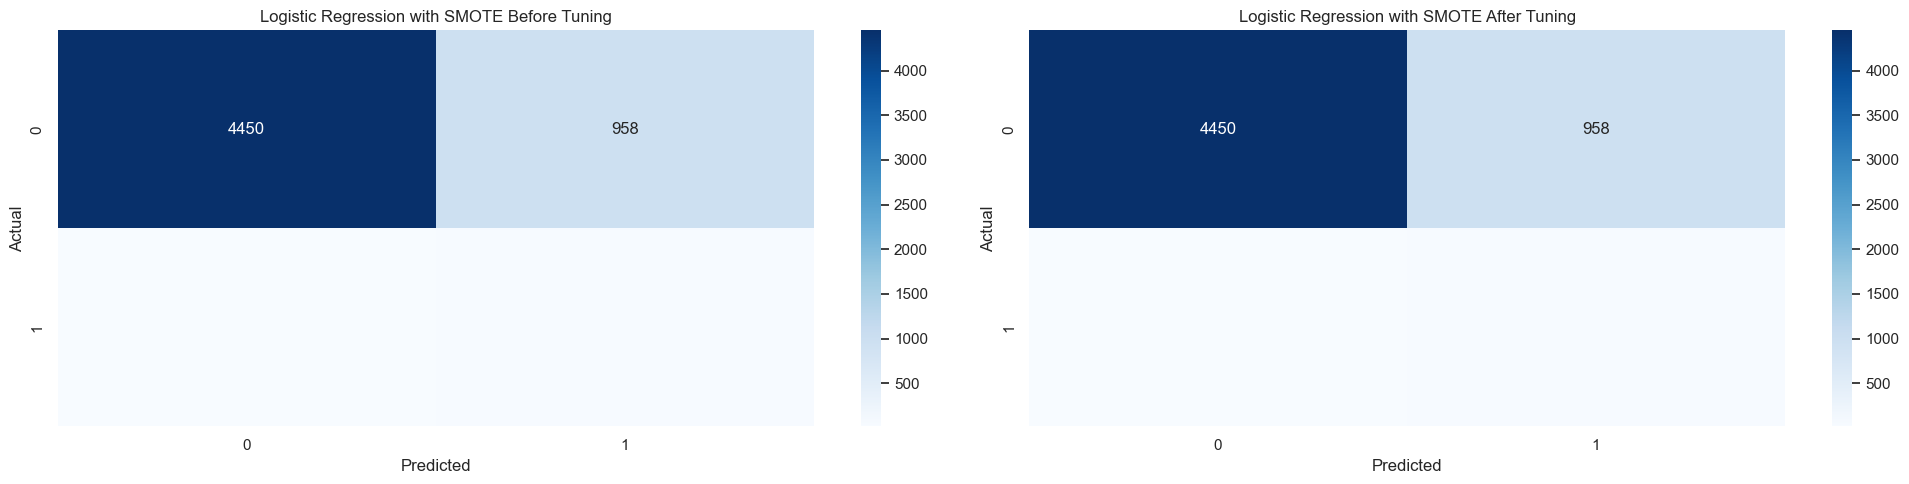

In [60]:
# Predictions before tuning
y_pred_before = best_logreg_smote.predict(X_test)

# Predictions after tuning
y_pred_after = random_logreg_smote.best_estimator_.predict(X_test)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression with SMOTE Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression with SMOTE After Tuning')

plt.tight_layout()
plt.show()

In [61]:
# Evaluate Random Forest with Random Under Sampler
best_rf_rus = random_rf_rus.best_estimator_
best_rf_rus

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel',
                                                   'Gender']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Destination', 'Agency',
                                                   'Product Name']),
                                                 ('scaler', RobustScaler(),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=30, n_estimators=200,
                                        random_state=0))])

In [62]:
# Predict on the test set using the best Random Forest model with Random Under Sampler
best_rf_rus = random_rf_rus.best_estimator_
y_pred_rf_rus = best_rf_rus.predict(X_test)

print("Random Forest with Random Under Sampler - Test Set Evaluation")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_rus))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_rus))

Random Forest with Random Under Sampler - Test Set Evaluation
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      5408
           1       0.04      0.74      0.07        72

    accuracy                           0.76      5480
   macro avg       0.52      0.75      0.47      5480
weighted avg       0.98      0.76      0.85      5480

Confusion Matrix:
[[4103 1305]
 [  19   53]]


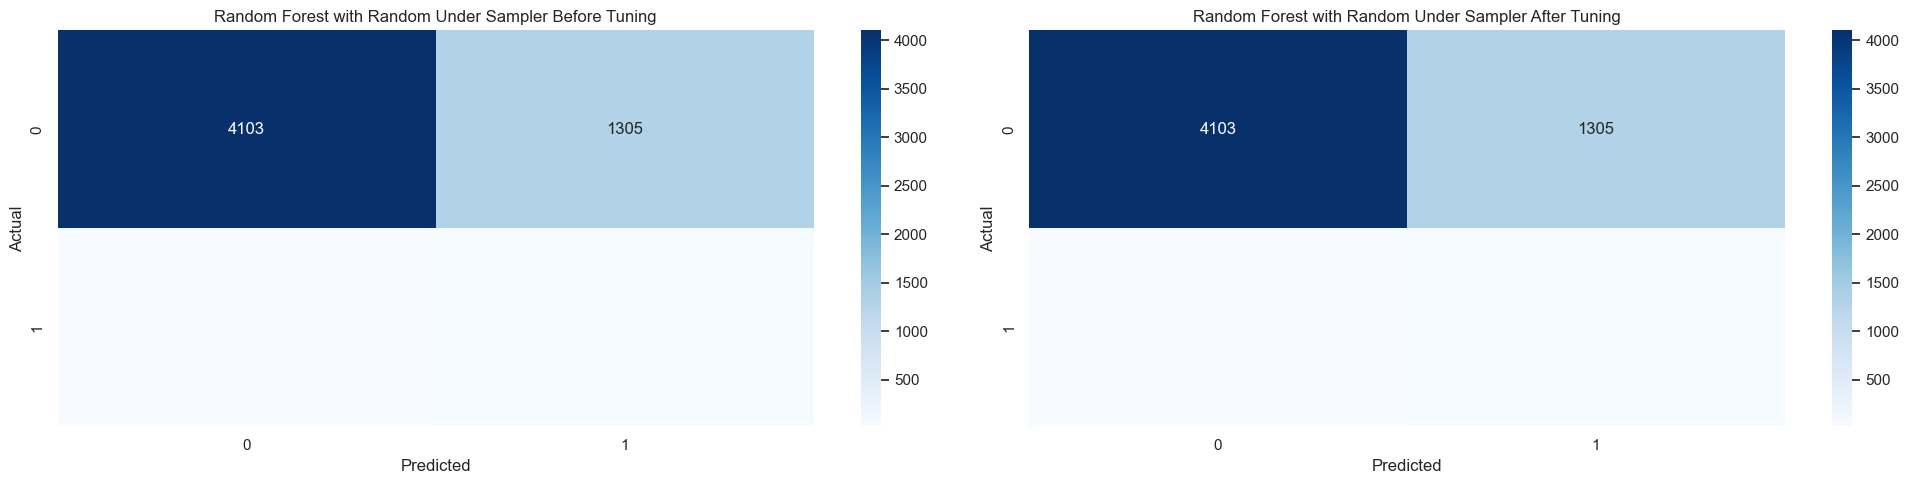

In [63]:
# Predictions before tuning
y_pred_before = best_rf_rus.predict(X_test)

# Predictions after tuning
y_pred_after = random_rf_rus.best_estimator_.predict(X_test)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with Random Under Sampler Before Tuning')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with Random Under Sampler After Tuning')

plt.tight_layout()
plt.show()

#### Adjust Threshold

In [64]:

# Predict probabilities for Logistic Regression with SMOTE
y_prob_logreg_smote = best_logreg_smote.predict_proba(X_test)[:, 1]

# Initialize variables for threshold tuning
th_values = [i/100 for i in range(20, 80)]
best_score = 0
best_th = 0
score_list = []

# Find the best threshold for recall
for th in th_values:
    y_pred = np.where(y_prob_logreg_smote > th, 1, 0)
    score_temp = recall_score(y_test, y_pred)
    score_list.append(score_temp)
    
    if score_temp > best_score:
        best_score = score_temp
        best_th = th

print('Best Recall Score for Logistic Regression with SMOTE:', best_score)
print('Best Threshold for Logistic Regression with SMOTE:', best_th)




Best Recall Score for Logistic Regression with SMOTE: 0.9305555555555556
Best Threshold for Logistic Regression with SMOTE: 0.2


In [65]:
# Predict with the best threshold
y_pred_logreg_threshold = np.where(y_prob_logreg_smote > best_th, 1, 0)

print("Logistic Regression with SMOTE - Adjusted Threshold Evaluation")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg_threshold))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_threshold))



Logistic Regression with SMOTE - Adjusted Threshold Evaluation
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.27      0.43      5408
           1       0.02      0.93      0.03        72

    accuracy                           0.28      5480
   macro avg       0.51      0.60      0.23      5480
weighted avg       0.98      0.28      0.42      5480

Confusion Matrix:
[[1472 3936]
 [   5   67]]


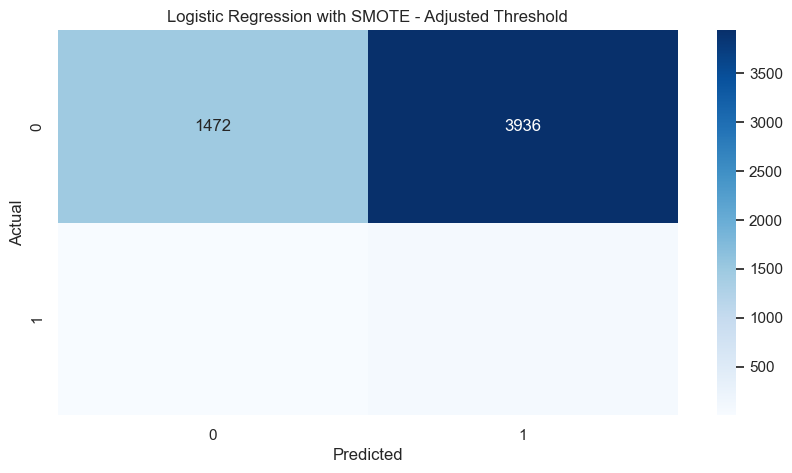

In [66]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_threshold), annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression with SMOTE - Adjusted Threshold')
plt.show()

In [67]:
# Predict probabilities for Random Forest with Random Under Sampler
y_prob_rf_rus = best_rf_rus.predict_proba(X_test)[:, 1]

# Initialize variables for threshold tuning
best_score = 0
best_th = 0
score_list = []

# Find the best threshold for recall
for th in th_values:
    y_pred = np.where(y_prob_rf_rus > th, 1, 0)
    score_temp = recall_score(y_test, y_pred)
    score_list.append(score_temp)
    
    if score_temp > best_score:
        best_score = score_temp
        best_th = th

print('Best Recall Score for Random Forest with Random Under Sampler:', best_score)
print('Best Threshold for Random Forest with Random Under Sampler:', best_th)


Best Recall Score for Random Forest with Random Under Sampler: 0.9166666666666666
Best Threshold for Random Forest with Random Under Sampler: 0.2


In [68]:

# Predict with the best threshold
y_pred_rf_threshold = np.where(y_prob_rf_rus > best_th, 1, 0)

print("Random Forest with Random Under Sampler - Adjusted Threshold Evaluation")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_threshold))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_threshold))


Random Forest with Random Under Sampler - Adjusted Threshold Evaluation
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.35      0.52      5408
           1       0.02      0.92      0.04        72

    accuracy                           0.36      5480
   macro avg       0.51      0.64      0.28      5480
weighted avg       0.98      0.36      0.52      5480

Confusion Matrix:
[[1917 3491]
 [   6   66]]


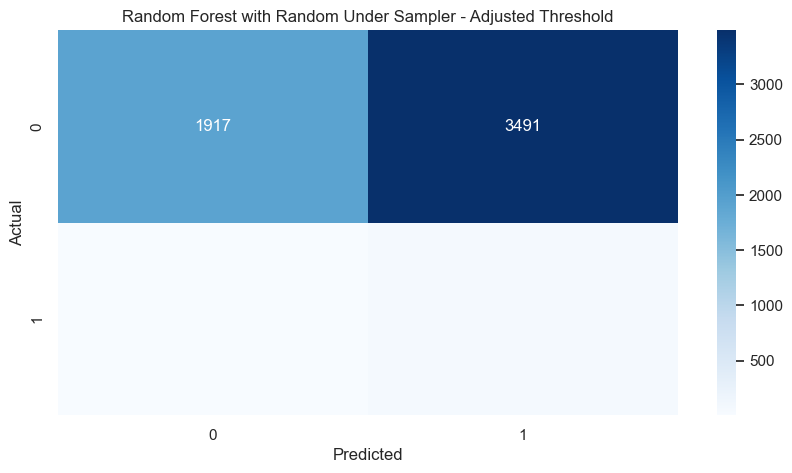

In [69]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_threshold), annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with Random Under Sampler - Adjusted Threshold')
plt.show()

In [70]:
# Compare both models
logreg_report = classification_report(y_test, y_pred_logreg_threshold, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf_threshold, output_dict=True)

comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [
        logreg_report['1']['precision'], 
        logreg_report['1']['recall'], 
        logreg_report['1']['f1-score']
    ],
    'Random Forest': [
        rf_report['1']['precision'], 
        rf_report['1']['recall'], 
        rf_report['1']['f1-score']
    ]
})

comparison_df


,Metric,Logistic Regression,Random Forest
0,Precision,0.016737,0.018555
1,Recall,0.930556,0.916667
2,F1-Score,0.032883,0.036374


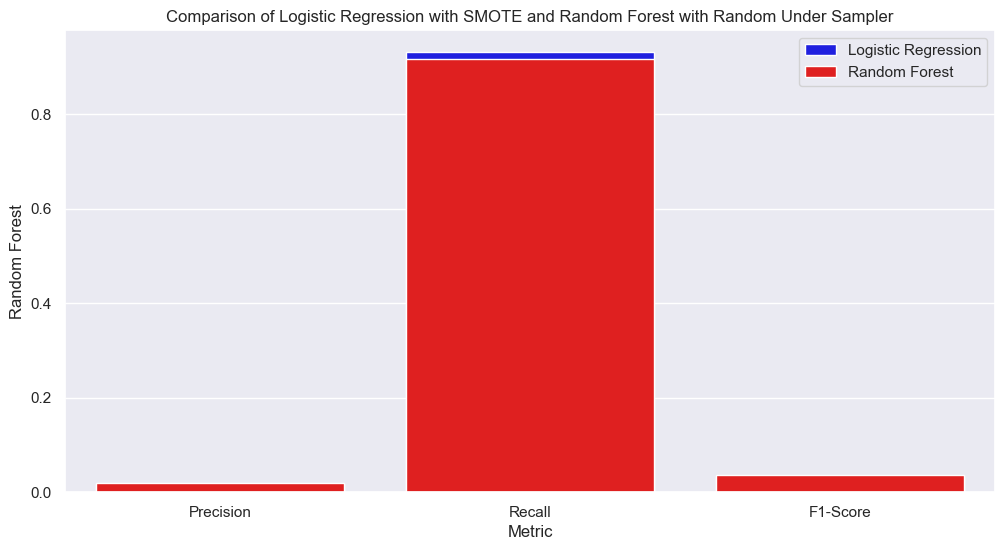

In [71]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Logistic Regression', data=comparison_df, label='Logistic Regression', color='b')
sns.barplot(x='Metric', y='Random Forest', data=comparison_df, label='Random Forest', color='r')
plt.title('Comparison of Logistic Regression with SMOTE and Random Forest with Random Under Sampler')
plt.legend()
plt.show()

#### Interpretation 

1. Precision

- Logistic Regression: 0.016737
- Random Forest: 0.018555
Precision indicates the proportion of positive identifications that were actually correct. Both models show extremely low precision, meaning they have a high rate of false positives. The Random Forest model has slightly better precision than Logistic Regression.

2. Recall

- Logistic Regression: 0.930556
- Random Forest: 0.916667
Recall measures the proportion of actual positives that were correctly identified. Both models have very high recall, with Logistic Regression slightly outperforming Random Forest. This indicates that both models are very good at identifying actual claims, which is critical in an imbalanced dataset where we aim to capture as many positive cases as possible.

3. F1-Score

- Logistic Regression: 0.032883
- Random Forest: 0.036374
The F1-score is the harmonic mean of precision and recall, providing a balance between the two. Both models have very low F1-scores due to their low precision, though Random Forest performs marginally better than Logistic Regression. This highlights the trade-off between precision and recall in imbalanced datasets.

Based on the results and the primary goal of maximizing recall, Logistic Regression with SMOTE is the recommended final model. Here’s why:

- Higher Recall: Logistic Regression with SMOTE has a slightly higher recall (0.930556) compared to Random Forest with Random Under Sampler (0.916667). In the context of imbalanced datasets and predicting claims, recall is crucial because we want to identify as many actual positive cases as possible.

- Precision: While both models have low precision, Logistic Regression is marginally lower. However, given the emphasis on recall, this trade-off is acceptable.

- Model Simplicity and Interpretability: Logistic Regression is simpler and more interpretable compared to Random Forest. This can be an advantage when explaining the model to stakeholders or understanding the impact of different features.

#### Final Model

Logistic Regression with SMOTE - Initial Evaluation
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      5408
           1       0.05      0.74      0.10        72

    accuracy                           0.82      5480
   macro avg       0.52      0.78      0.50      5480
weighted avg       0.98      0.82      0.89      5480

Confusion Matrix:
[[4451  957]
 [  19   53]]
Logistic Regression with SMOTE - Test Set Evaluation (Adjusted Threshold)
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      5408
           1       0.05      0.74      0.09        72

    accuracy                           0.81      5480
   macro avg       0.52      0.77      0.49      5480
weighted avg       0.98      0.81      0.88      5480

Confusion Matrix:
[[4400 1008]
 [  19   53]]


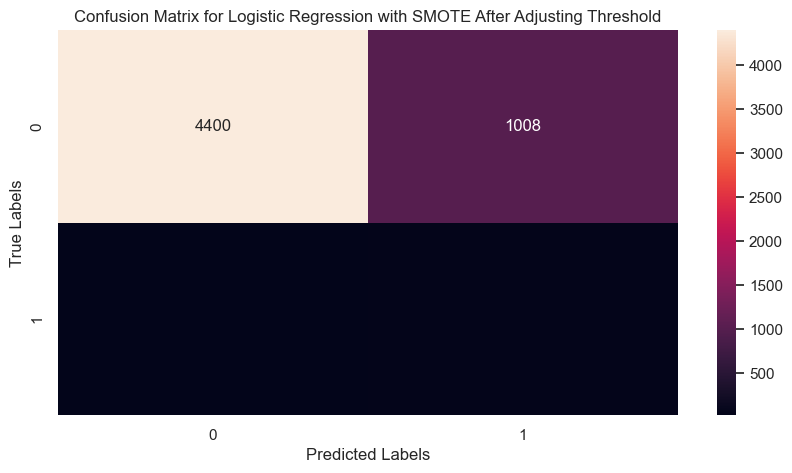

In [72]:
# Define the transformer, model, and SMOTE in a pipeline
model_logreg_smote = LogisticRegression(random_state=0)

pipeline_logreg_smote = ImbPipeline([
    ('transformer', transformer),
    ('resampling', SMOTE(random_state=42)),
    ('model', model_logreg_smote)
])

# Fit the model on training data
pipeline_logreg_smote.fit(X_train, y_train)

# Predict on the test set using the trained model
y_pred_logreg_smote = pipeline_logreg_smote.predict(X_test)

# Evaluate the model
print("Logistic Regression with SMOTE - Initial Evaluation")
print(classification_report(y_test, y_pred_logreg_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_smote))

# Assume 'random_logreg_smote.best_estimator_' is already defined and properly trained
# Use this if you have previously performed hyperparameter tuning and saved the best model
best_logreg_smote = random_logreg_smote.best_estimator_

# Predict probabilities
y_prob_logreg_smote = best_logreg_smote.predict_proba(X_test)[:, 1]

# Adjust the decision threshold
threshold = 0.49
y_pred_adjusted = np.where(y_prob_logreg_smote > threshold, 1, 0)

# Evaluate the adjusted model
print("Logistic Regression with SMOTE - Test Set Evaluation (Adjusted Threshold)")
print(classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))

# Visualizing the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt="d")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression with SMOTE After Adjusting Threshold')
plt.show()



Initial Evaluation

Precision for Class 1: Very low at 5%, meaning that of all the instances predicted as class 1, only 5% were actually class 1.
Recall for Class 1: Quite high at 74%, indicating that the model was able to identify 74% of all actual class 1 instances.
F1-Score for Class 1: Low at 10%, which reflects the balance between precision and recall — here skewed by very low precision.
Overall Accuracy: 82%, although this metric is less informative in this context due to the significant class imbalance.

Confusion Matrix Analysis:

True Negatives (TN): 4451 (correctly predicted class 0)
False Positives (FP): 957 (incorrectly predicted as class 1)
False Negatives (FN): 19 (incorrectly missed class 1 predictions)
True Positives (TP): 53 (correctly predicted class 1)

After Adjusting Threshold
Precision for Class 1: Remains very low at 5%.
Recall for Class 1: Consistently high at 74%.
F1-Score for Class 1: Slightly decreased to 9%.
Overall Accuracy: Slightly decreased to 81%.
Confusion Matrix Analysis:

TN: 4400
FP: 1008 (increase in false positives, showing a trade-off for maintaining high recall)
FN: 19 (remains stable)
TP: 53 (stable)


Interpretation

- The adjustment of the threshold was aimed at increasing the true positive rate or recall for class 1. While the recall remained the same, the change in threshold resulted in more false positives, slightly lowering the overall accuracy and F1-score.
- This model prioritizes identifying class 1 at the expense of a higher false positive rate, which is evident from the high recall and low precision. - Depending on the business context, such as in fraud detection or disease screening where missing a positive case (class 1) could have serious consequences, this trade-off might be acceptable.
- The choice to use SMOTE has helped in addressing class imbalance by improving the model's ability to detect the minority class, but it comes with the cost of reduced precision, leading to many false alarms (false positives).


#### Feature Importance

In [74]:
# Get the feature names after one-hot encoding and binary encoding
feature_names = transformer.get_feature_names_out()

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['', '', '', '', '', '']

In [75]:
# First, let's see what the output of get_feature_names_out() gives us
features = transformer.get_feature_names_out()
print(features)

# If the names have a prefix that you need to remove, adjust the splitting accordingly
list_features = [feature.split('__')[-1] for feature in features]  # Adjust split based on actual output

# Now print the transformed feature names to see if they are correct
print(list_features)


['onehot__Agency Type_Airlines' 'onehot__Agency Type_Travel Agency'
 'onehot__Distribution Channel_Offline'
 'onehot__Distribution Channel_Online' 'onehot__Gender_F'
 'onehot__Gender_M' 'onehot__Gender_Prefer not say'
 'binary__Destination_0' 'binary__Destination_1' 'binary__Destination_2'
 'binary__Destination_3' 'binary__Destination_4' 'binary__Destination_5'
 'binary__Destination_6' 'binary__Agency_0' 'binary__Agency_1'
 'binary__Agency_2' 'binary__Agency_3' 'binary__Product Name_0'
 'binary__Product Name_1' 'binary__Product Name_2'
 'binary__Product Name_3' 'binary__Product Name_4' 'scaler__Duration'
 'scaler__Net Sales' 'scaler__Commision (in value)' 'scaler__Age']
['Agency Type_Airlines', 'Agency Type_Travel Agency', 'Distribution Channel_Offline', 'Distribution Channel_Online', 'Gender_F', 'Gender_M', 'Gender_Prefer not say', 'Destination_0', 'Destination_1', 'Destination_2', 'Destination_3', 'Destination_4', 'Destination_5', 'Destination_6', 'Agency_0', 'Agency_1', 'Agency_2', 

In [77]:

# Extract the logistic regression model from the pipeline (assuming it's the last step)
model_final = random_logreg_smote.best_estimator_

logreg_model = model_final.named_steps['model']

# Get the coefficients
coefficients = logreg_model.coef_[0]  # For binary classification, it's a 1D array

# You can pair these coefficients with their corresponding feature names
feature_names = transformer.get_feature_names_out()  # Adjust based on your transformer



In [79]:
# Combine feature names and coefficients into a DataFrame for better readability

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Display the feature importances sorted by absolute value of the importance
feature_importance['Abs Importance'] = feature_importance['Importance'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Abs Importance', ascending=False)

feature_importance_sorted


,Feature,Importance,Abs Importance
7,binary__Destination_0,-3.426528,3.426528
15,binary__Agency_1,-1.621238,1.621238
14,binary__Agency_0,1.404269,1.404269
21,binary__Product Name_3,-1.363425,1.363425
17,binary__Agency_3,0.711209,0.711209
6,onehot__Gender_Prefer not say,-0.698956,0.698956
19,binary__Product Name_1,-0.599308,0.599308
2,onehot__Distribution Channel_Offline,-0.587993,0.587993
8,binary__Destination_1,-0.538647,0.538647
9,binary__Destination_2,-0.527828,0.527828


 The feature importance values represent the coefficients of the features in the logistic regression model. Positive coefficients indicate that an increase in the feature value increases the likelihood of the positive class (claim), while negative coefficients indicate that an increase in the feature value decreases the likelihood of the positive class.

Key Insights:

1. Top Features with High Absolute Importance:

- binary__Destination_0: This feature has the highest absolute importance with a negative coefficient (-3.426528), indicating that this specific destination significantly decreases the likelihood of a claim.
- binary__Agency_1 and binary__Agency_0: These features also have high absolute importance. Agency_1 decreases the likelihood of a claim while Agency_0 increases it.
- binary__Product Name_3: This feature significantly decreases the likelihood of a claim.
- binary__Agency_3: This feature increases the likelihood of a claim.

2. Other Notable Features:

- onehot__Gender_Prefer not say: This feature has a significant negative impact on the likelihood of a claim.
- onehot__Distribution Channel_Offline: This feature negatively impacts the likelihood of a claim.
- scaler__Commision (in value) and scaler__Net Sales: These numerical features have positive coefficients, indicating that higher values for commission and net sales slightly increase the likelihood of a claim.

3. Less Impactful Features:

- Features like scaler__Age, onehot__Gender_M, and some specific product names and destinations have lower absolute importance, indicating they have a less significant impact on the model's predictions.

##### Business Implications:
- Travel Agencies and Products: Specific travel agencies and product names play a crucial role in predicting claims. Identifying and possibly investigating why certain agencies and products have higher or lower claims can help in risk assessment and management.
- Destinations: Certain destinations significantly affect the likelihood of claims. This insight can be used to tailor insurance products or adjust premiums based on destination-related risk.
- Demographic Factors: Gender and age have less impact compared to other features but still contribute to the model. Understanding these demographics can aid in better customer profiling.

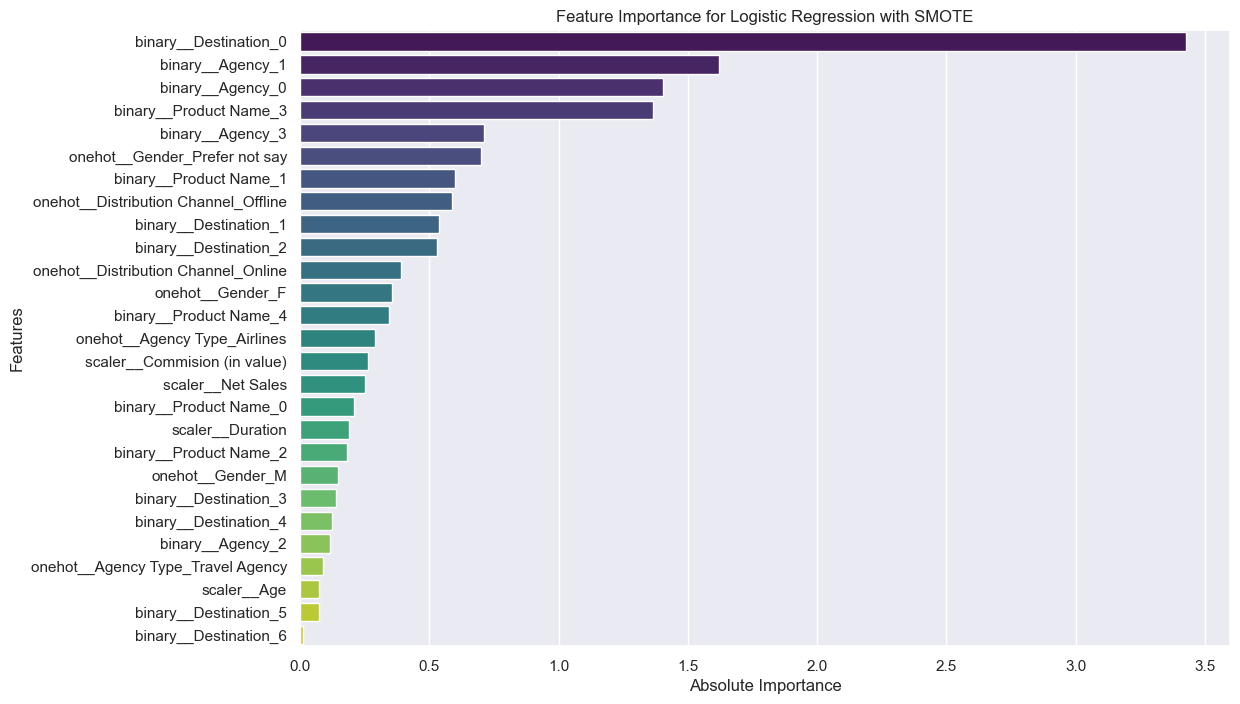

In [80]:
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Abs Importance', y='Feature', data=feature_importance_sorted, palette='viridis')
plt.xlabel('Absolute Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression with SMOTE')
plt.show()

In [81]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


### Explainable AI

In [82]:
import shap

In [111]:

# Ensure your final model is logistic regression model with SMOTE
model_final = random_logreg_smote.best_estimator_
print(model_final.named_steps['model'].predict)


<bound method LinearClassifierMixin.predict of LogisticRegression(C=1, random_state=0, solver='liblinear')>


In [123]:
# Prepare the explainer with the transformed features
X_test_transformed = model_final.named_steps['transformer'].transform(X_test)

explainer = shap.Explainer(
    model_final.named_steps['model'],  # Access the model step in the pipeline
    X_test_transformed  # Transformed features
)
shap_values = explainer(model_final[0].transform(X_test))

In [181]:
i = 350
X_test.iloc[i],y_test.iloc[i]

(Agency                                       EPX
 Agency Type                        Travel Agency
 Distribution Channel                      Online
 Product Name            2 way Comprehensive Plan
 Gender                            Prefer not say
 Duration                                      91
 Destination                            SRI LANKA
 Net Sales                                   21.0
 Commision (in value)                         0.0
 Age                                           36
 Name: 5394, dtype: object,
 0)

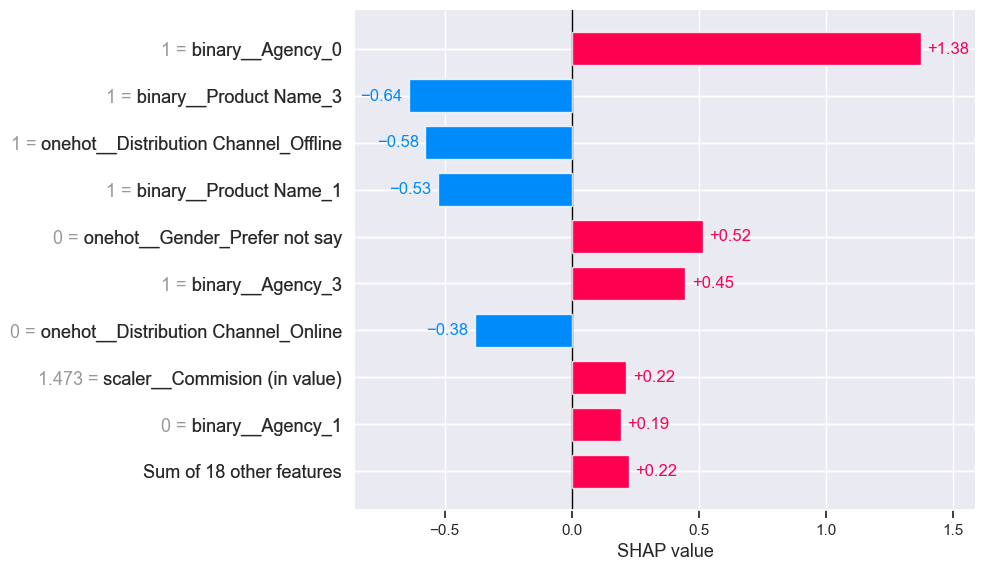

In [180]:
# Visualize the SHAP values for explain obvervation in test
shap.plots.bar(shap_values[i])

In [126]:
[i for i in enumerate(list_features)]

[(0, 'Agency Type_Airlines'),
 (1, 'Agency Type_Travel Agency'),
 (2, 'Distribution Channel_Offline'),
 (3, 'Distribution Channel_Online'),
 (4, 'Gender_F'),
 (5, 'Gender_M'),
 (6, 'Gender_Prefer not say'),
 (7, 'Destination_0'),
 (8, 'Destination_1'),
 (9, 'Destination_2'),
 (10, 'Destination_3'),
 (11, 'Destination_4'),
 (12, 'Destination_5'),
 (13, 'Destination_6'),
 (14, 'Agency_0'),
 (15, 'Agency_1'),
 (16, 'Agency_2'),
 (17, 'Agency_3'),
 (18, 'Product Name_0'),
 (19, 'Product Name_1'),
 (20, 'Product Name_2'),
 (21, 'Product Name_3'),
 (22, 'Product Name_4'),
 (23, 'Duration'),
 (24, 'Net Sales'),
 (25, 'Commision (in value)'),
 (26, 'Age')]

In [128]:
# Ensure the final model is correctly assigned
model_final = random_logreg_smote.best_estimator_

# Transform the training data
X_train_trans = model_final.named_steps['transformer'].transform(X_train)

# Create the SHAP explainer for the logistic regression model
explainer = shap.Explainer(
    model_final.named_steps['model'],  # Access the model step in the pipeline
    X_train_trans  # Transformed training features
)

# Calculate SHAP values for the transformed training set
shap_values = explainer(X_train_trans)

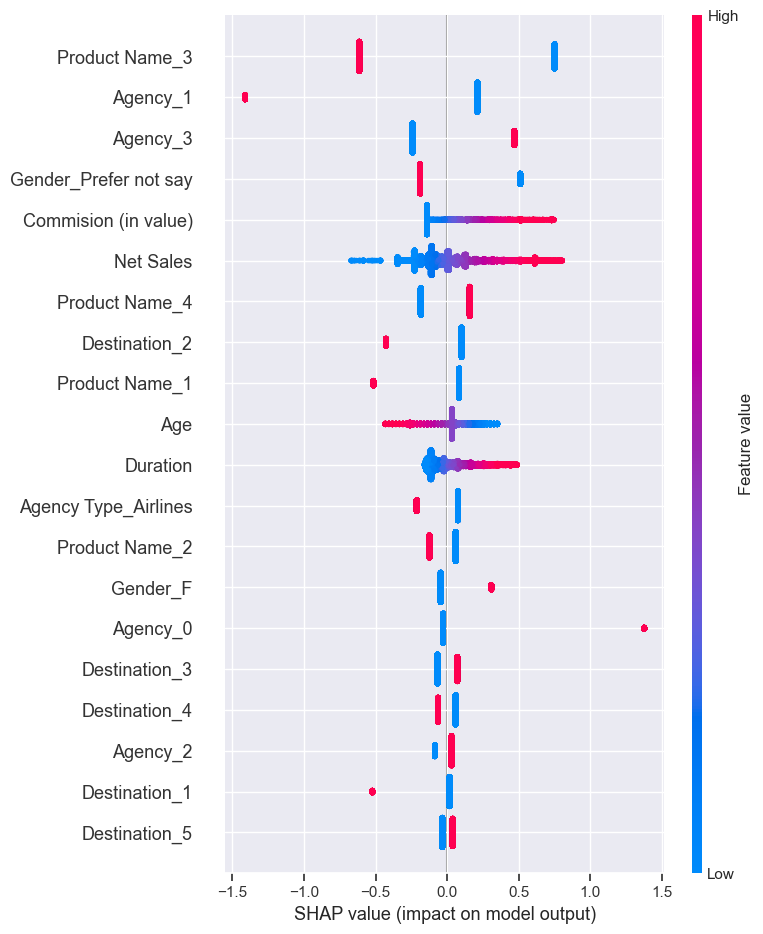

In [129]:
# Visualize the summary of SHAP values for all features in the training set
shap.summary_plot(shap_values, X_train_trans, feature_names=list_features)

In [130]:
# Define the SHAP plot function for your model
def shap_plot(idx, model, dataset):
    # Prepare the explainer with the transformed dataset
    explainer = shap.Explainer(model.named_steps['model'])
    shap_values = explainer(dataset)
    
    # Generate the SHAP force plot
    p = shap.force_plot(explainer.expected_value, shap_values.values[idx], dataset[idx])
    return p

In [131]:
X_test.iloc[0],y_test.iloc[0]

(Agency                                              CWT
 Agency Type                               Travel Agency
 Distribution Channel                             Online
 Product Name            Rental Vehicle Excess Insurance
 Gender                                   Prefer not say
 Duration                                             20
 Destination                                    MALAYSIA
 Net Sales                                          39.6
 Commision (in value)                              23.76
 Age                                                  47
 Name: 29998, dtype: object,
 0)

In [141]:
# Transform the X_test data using the transformer part of the pipeline
X_test_preprocessed = pd.DataFrame(model_final.named_steps['transformer'].transform(X_test))

# Assign the feature names to the transformed DataFrame
X_test_preprocessed.columns = list_features
X_test_preprocessed.head()


,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Gender_F,Gender_M,Gender_Prefer not say,Destination_0,Destination_1,Destination_2,...,Agency_3,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Duration,Net Sales,Commision (in value),Age
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.032258,0.695238,3.332398,3.666667
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.483871,1.952381,0.000000,0.000000
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-0.193548,-0.047619,0.000000,0.000000
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.258065,-0.238095,0.000000,5.333333
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,-0.451613,-0.333333,0.883590,4.000000


In [165]:

# Initialize JavaScript visualization for SHAP
shap.initjs()

# Ensure your final model is logistic regression model with SMOTE
model_final = random_logreg_smote.best_estimator_

# Transform the X_test data using the transformer part of the pipeline
X_test_preprocessed = pd.DataFrame(model_final.named_steps['transformer'].transform(X_test))

# Assign the feature names to the transformed DataFrame
X_test_preprocessed.columns = list_features

# Prepare the explainer with the transformed features
explainer = shap.Explainer(
    model_final.named_steps['model'],  # Access the model step in the pipeline
    X_test_preprocessed  # Transformed features
)

# Generate SHAP values for the test data
shap_values = explainer(X_test_preprocessed)

# Define the function to plot SHAP values for a specific observation
def shap_plot(idx, model, dataset):
    explainer_model = shap.Explainer(model, dataset)
    shap_values_model = explainer_model(dataset)
    p = shap.force_plot(explainer_model.expected_value, shap_values_model[idx].values, dataset.iloc[idx])
    return p

# Let's compare the real result
i = 3

print(f'The prediction for this customer is: {"Claim" if y_test.iloc[i] == 1 else "No Claim"} --> from y_test')

# This will create an interactive visualization which might not display directly in some IDEs.
shap_plot(
    i,
    model_final.named_steps['model'],
    X_test_preprocessed
)


The prediction for this customer is: No Claim --> from y_test


In [150]:
# LIME
import lime
from lime import lime_tabular

The prediction for this customer is: No Claim --> from y_test


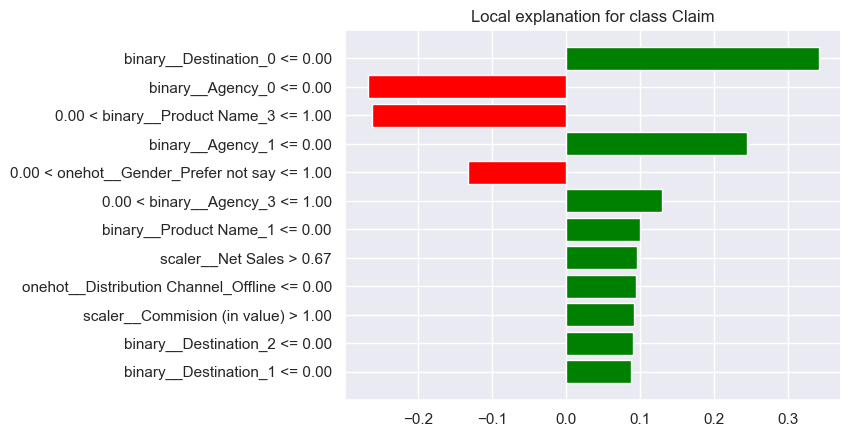

In [162]:
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt

# Ensure the final model is logistic regression model with SMOTE
model_final = random_logreg_smote.best_estimator_

# Transform the training and test data
X_train_transformed = model_final.named_steps['transformer'].transform(X_train)
X_test_transformed = model_final.named_steps['transformer'].transform(X_test)

# Convert transformed data to DataFrame to use feature names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=list_features)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=list_features)

# Prepare the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed_df.values,
    feature_names=list_features,
    class_names=['No Claim', 'Claim'],
    mode='classification'
)

# Choose an instance to explain
i = 0

print(f'The prediction for this customer is: {"Claim" if y_test.iloc[i] == 1 else "No Claim"} --> from y_test')

# Generate the explanation
exp = explainer.explain_instance(
    data_row=X_test_transformed_df.iloc[i].values,
    predict_fn=model_final.named_steps['model'].predict_proba,
    num_features=12
)

# Display the explanation
exp.as_pyplot_figure()
plt.show()


In [163]:

# Ensure final model is logistic regression model with SMOTE
model_final = random_logreg_smote.best_estimator_

# Transform the training and test data
X_train_transformed = model_final.named_steps['transformer'].transform(X_train)
X_test_transformed = model_final.named_steps['transformer'].transform(X_test)

# Convert transformed data to DataFrame to use feature names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=list_features)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=list_features)

# Prepare the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed_df.values,
    feature_names=list_features,
    class_names=['No Claim', 'Claim'],
    mode='classification'
)

# Choose an instance to explain
i = 100
instance_transformed = X_test_transformed_df.iloc[i]

# Generate the explanation
exp = explainer.explain_instance(
    data_row=instance_transformed.values,
    predict_fn=model_final.named_steps['model'].predict_proba
)

# Show the explanation
exp.show_in_notebook(show_all=False)


In [166]:
import pickle

# Ensure your final model is logistic regression with SMOTE
model_final = random_logreg_smote.best_estimator_

# Fit the model to ensure it's trained before saving (although it should already be fitted)
model_final.fit(X_train, y_train)

# Save the model using pickle
pickle.dump(model_final, open('Logreg_SMOTE_Threshold.sav', 'wb'))
